## https://www.kaggle.com/competitions/pii-detection-removal-from-educational-data/overview/evaluation
## https://www.kaggle.com/code/qamarmath/ensemble-model-prediction-with-comprehensive-explo/notebook

In [73]:
import pandas as pd

df=pd.read_json('data/train.json')

In [10]:
df.head()

,document,full_text,tokens,trailing_whitespace,labels
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-..."
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT..."
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST..."


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   document             6807 non-null   int64 
 1   full_text            6807 non-null   object
 2   tokens               6807 non-null   object
 3   trailing_whitespace  6807 non-null   object
 4   labels               6807 non-null   object
dtypes: int64(1), object(4)
memory usage: 266.0+ KB


In [42]:
labels=df['labels'].explode().unique()
labels.sort()
print(labels)

['B-EMAIL' 'B-ID_NUM' 'B-NAME_STUDENT' 'B-PHONE_NUM' 'B-STREET_ADDRESS'
 'B-URL_PERSONAL' 'B-USERNAME' 'I-ID_NUM' 'I-NAME_STUDENT' 'I-PHONE_NUM'
 'I-STREET_ADDRESS' 'I-URL_PERSONAL' 'O']


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   document             6807 non-null   int64 
 1   full_text            6807 non-null   object
 2   tokens               6807 non-null   object
 3   trailing_whitespace  6807 non-null   object
 4   labels               6807 non-null   object
dtypes: int64(1), object(4)
memory usage: 266.0+ KB
None


In [55]:
df.describe()

,document
count,6807.000000
mean,14739.782283
std,4920.715769
min,7.000000
25%,11061.500000
50%,14818.000000
75%,18974.000000
max,22687.000000


In [62]:
df.sort_values('document').tail()

,document,full_text,tokens,trailing_whitespace,labels
6802,22678,EXAMPLE – JOURNEY MAP\n\nTHE CHALLENGE My w...,"[EXAMPLE, –, JOURNEY, MAP, \n\n, THE, CHALLENG...","[True, True, True, False, False, True, True, F...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
6803,22679,Why Mind Mapping?\n\nMind maps are graphical r...,"[Why, Mind, Mapping, ?, \n\n, Mind, maps, are,...","[True, True, False, False, False, True, True, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
6804,22681,"Challenge\n\nSo, a few months back, I had chos...","[Challenge, \n\n, So, ,, a, few, months, back,...","[False, False, False, True, True, True, True, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
6805,22684,Brainstorming\n\nChallenge & Selection\n\nBrai...,"[Brainstorming, \n\n, Challenge, &, Selection,...","[False, False, True, True, False, False, True,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
6806,22687,Mind Mapping\n\nChallenge\n\nMy consulting tea...,"[Mind, Mapping, \n\n, Challenge, \n\n, My, con...","[True, False, False, False, False, True, True,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


/opt/apache/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


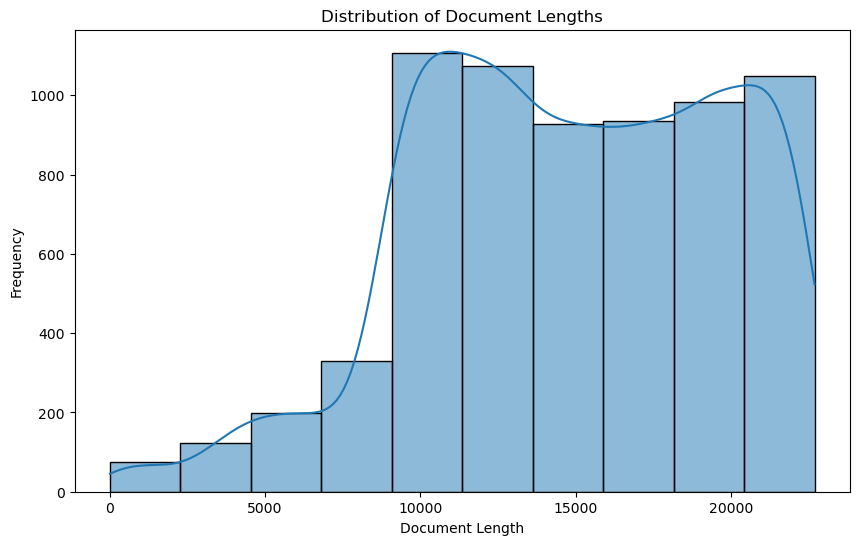

In [64]:
# Visualize the distribution of document lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['document'], bins=10, kde=True)
plt.title("Distribution of Document Lengths")
plt.xlabel("Document Length")
plt.ylabel("Frequency")
plt.show()


/opt/apache/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


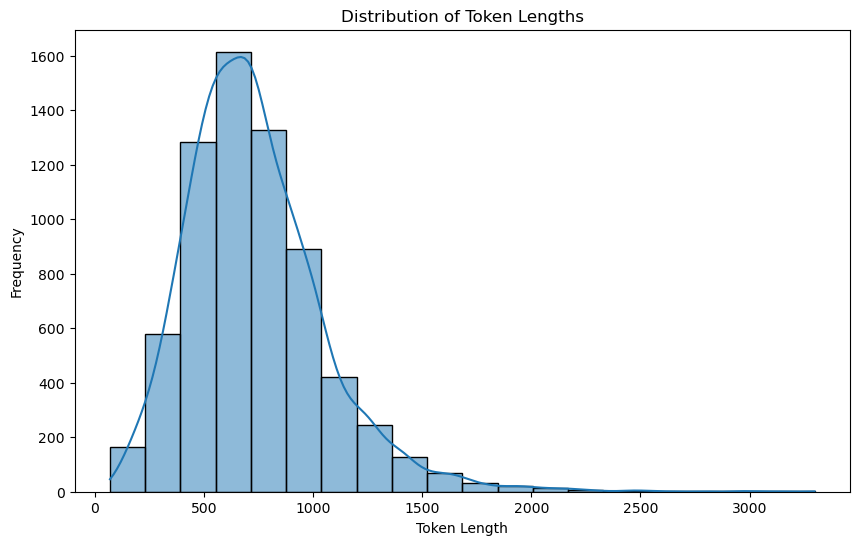

In [75]:
df['token_length'] = df['tokens'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['token_length'], bins=20, kde=True)
plt.title("Distribution of Token Lengths")
plt.xlabel("Token Length")
plt.ylabel("Frequency")
plt.show()


In [86]:
df[:1].trailing_whitespace[0].count(False)

186

In [93]:
# Visualize the distribution of trailing whitespace using a bar plot
df['trailing_whitespace_count'] = df['trailing_whitespace'].apply(lambda x: x.count(True))


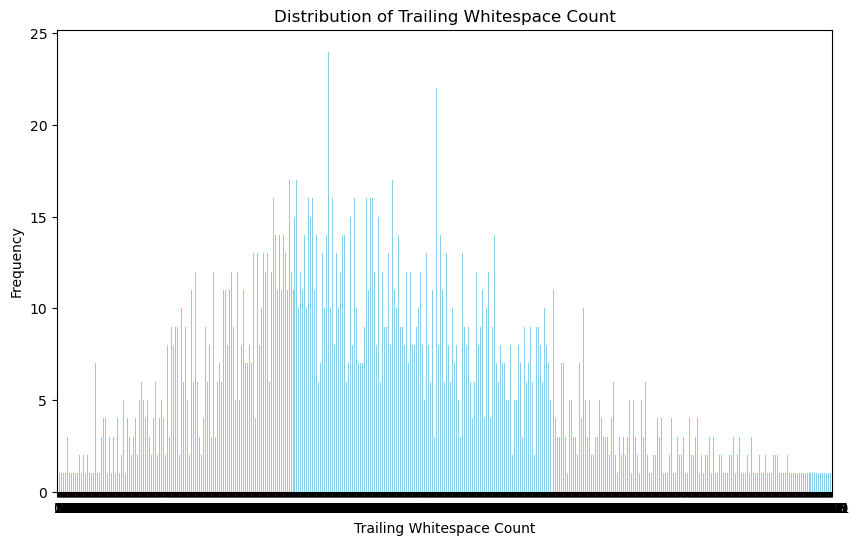

In [95]:
# Visualize the distribution of trailing whitespace using a bar plot
df['trailing_whitespace_count'] = df['trailing_whitespace'].apply(lambda x: x.count(True))
plt.figure(figsize=(10, 6))
df['trailing_whitespace_count'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Distribution of Trailing Whitespace Count")
plt.xlabel("Trailing Whitespace Count")
plt.ylabel("Frequency")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()